In [1]:
# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#  Read Data

In [3]:
df= pd.read_excel(r"C:\Users\shivani\Downloads\19. Flight_price.xlsx")

In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
df.shape 

(10683, 11)

In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
df['Date_of_Journey']= pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')

In [11]:
df['Dep_Time']= pd.to_datetime(df['Dep_Time'],format='%H:%M')

In [12]:
df['Journey_Date']= df['Date_of_Journey'].dt.day
df['Journey_Month']= df['Date_of_Journey'].dt.month
df['Journey_Year'] = df['Date_of_Journey'].dt.year

In [13]:
df.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

In [14]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [15]:
df['Departure_Hour']= df['Dep_Time'].dt.hour
df['Departure_Minute']= df['Dep_Time'].dt.minute

In [16]:
df.drop(columns=['Dep_Time'],axis=1,inplace=True)

In [17]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [18]:
df['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [19]:
df['Arrival_Hour']= pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Minute']= pd.to_datetime(df['Arrival_Time']).dt.minute

In [20]:
df.drop(columns=['Arrival_Time'],axis=1,inplace=True)

In [21]:
"2h 50m".split()

['2h', '50m']

In [22]:
duration = list(df['Duration'])


for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i].strip()


duration_hours = []
duration_mins = []

for i in range(len(duration)):
    hours = int(duration[i].split(sep="h")[0])
    mins = int(duration[i].split(sep="h")[1].strip(" m"))
    duration_hours.append(hours)
    duration_mins.append(mins)

In [23]:
df["Duration_hours"]= duration_hours
df["Duration_minutes"]= duration_mins

In [24]:
df.drop(columns=['Duration','Route','Additional_Info'],axis=1,inplace=True)

In [25]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [26]:
df['Total_Stops']=df['Total_Stops'].map({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [27]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


# EDA on Data

In [28]:
airline_prices = df.groupby('Airline')['Price'].mean().reset_index()

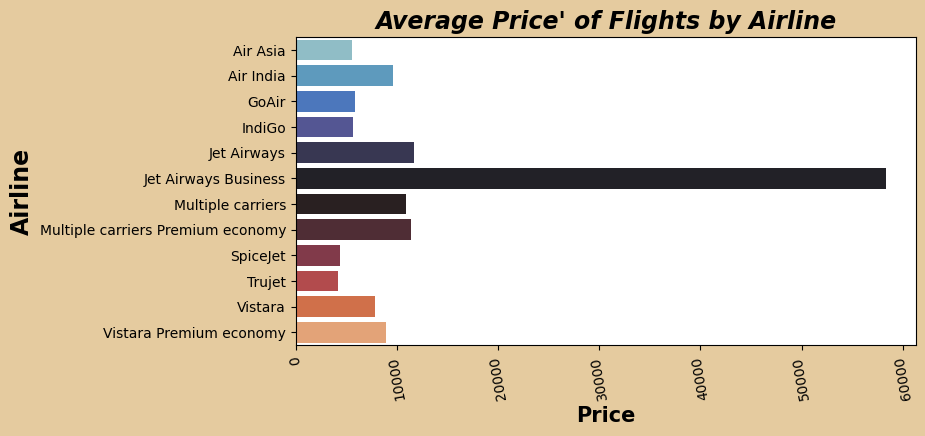

In [29]:
plt.figure(figsize=(8,4))
sns.barplot(x='Price',y='Airline',data=airline_prices,palette="icefire")
plt.title("Average Price' of Flights by Airline",fontweight='bold',color='black',size=17,fontstyle='italic')
plt.xlabel('Price',size=15,fontweight='bold')
plt.ylabel('Airline',size=17,fontweight='bold')
plt.gcf().set_facecolor('#E5CB9F')
plt.xticks(rotation=100)
plt.show()

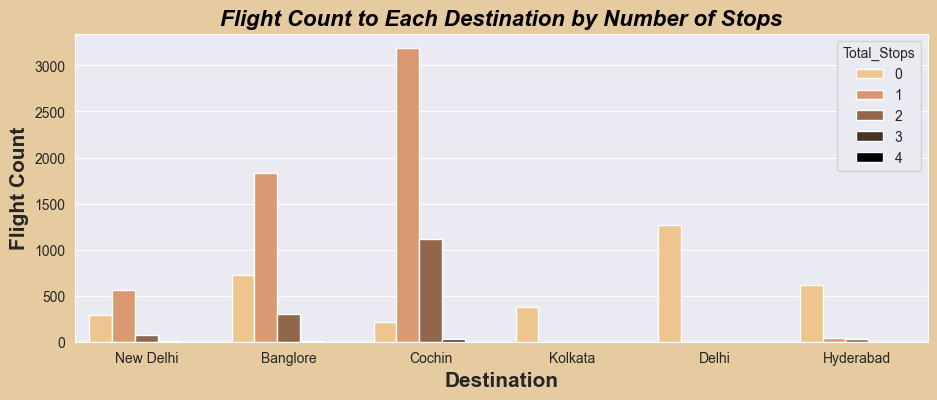

In [30]:
plt.figure(figsize=(11,4))
sns.set_style('darkgrid')
sns.countplot(x='Destination',hue='Total_Stops',data=df,palette='copper_r')
plt.title('Flight Count to Each Destination by Number of Stops',fontweight='bold',color='black',size=16,fontstyle='italic')
plt.xlabel('Destination',size=15,fontweight='bold')
plt.ylabel('Flight Count',size=15,fontweight='bold')
plt.gcf().set_facecolor('#E5CB9F')
plt.show()

In [31]:
duration_price = df.groupby('Duration_hours')['Price'].mean().reset_index()

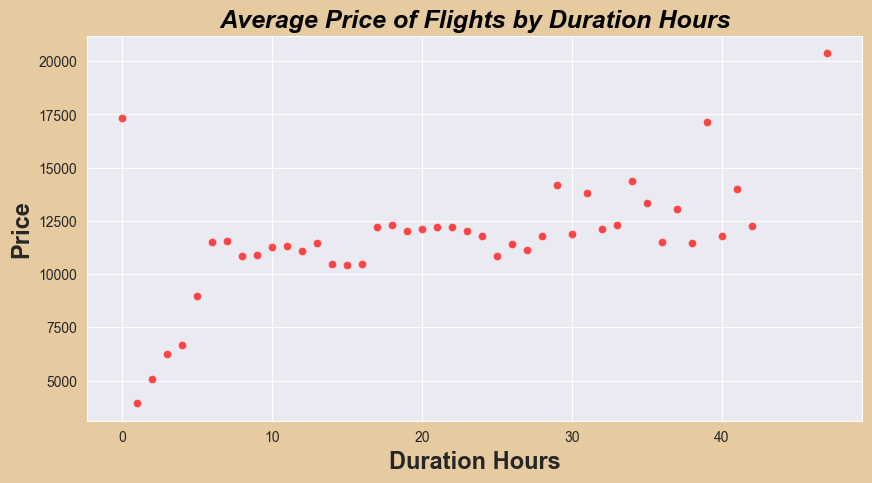

In [32]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Duration_hours', y='Price', data=duration_price, color='red',alpha=0.7)
plt.title('Average Price of Flights by Duration Hours',fontweight='bold',color='black',size=18,fontstyle='italic')
plt.xlabel('Duration Hours',size=17,fontweight='bold')
plt.ylabel('Price',size=17,fontweight='bold')
plt.gcf().set_facecolor('#E5CB9F')
plt.grid(True)
plt.show()

In [33]:
month_price = df.groupby('Journey_Month')['Price'].mean().reset_index()

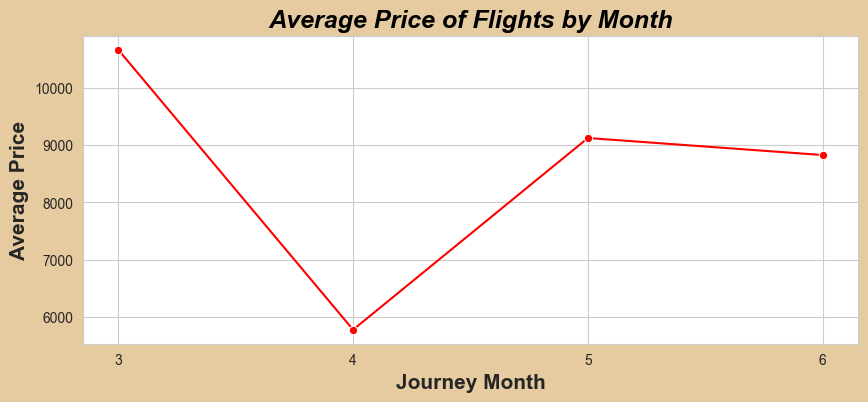

In [34]:
plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
sns.lineplot(x='Journey_Month', y='Price', data=month_price, marker='o', color='red')
plt.title('Average Price of Flights by Month',fontweight='bold',color='black',size=18,fontstyle='italic')
plt.xlabel('Journey Month',size=15,fontweight='bold')
plt.ylabel('Average Price',size=15,fontweight='bold')
plt.xticks(month_price['Journey_Month'])
plt.gcf().set_facecolor('#E5CB9F')
plt.grid(True)
plt.show()

In [35]:
#dummies= pd.get_dummies(df,drop_first=True,dtype="int")

In [36]:
from sklearn.preprocessing import OrdinalEncoder

In [37]:
en_data= ['Airline','Source','Destination']   

In [38]:
ordinal= OrdinalEncoder()

In [39]:
df[en_data]= ordinal.fit_transform(df[en_data]) 

In [40]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes
0,3.0,0.0,5.0,0,3897,24,3,2019,22,20,1,10,2,50
1,1.0,3.0,0.0,2,7662,1,5,2019,5,50,13,15,7,25
2,4.0,2.0,1.0,2,13882,9,6,2019,9,25,4,25,19,0
3,3.0,3.0,0.0,1,6218,12,5,2019,18,5,23,30,5,25
4,3.0,0.0,5.0,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,0,4107,9,4,2019,19,55,22,25,2,30
10679,1.0,3.0,0.0,0,4145,27,4,2019,20,45,23,20,2,35
10680,4.0,0.0,2.0,0,7229,27,4,2019,8,20,11,20,3,0
10681,10.0,0.0,5.0,0,12648,1,3,2019,11,30,14,10,2,40


In [41]:
df.reset_index(inplace=True)

In [42]:
df.drop('index',axis=1,inplace=True)

In [43]:
x= df.drop('Price',axis=1)
y= df['Price']

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
mn= MinMaxScaler()

In [46]:
cols= x.columns

In [47]:
x= mn.fit_transform(x)

In [48]:
x= pd.DataFrame(x,columns=cols)

In [49]:
x

,Airline,Source,Destination,Total_Stops,Journey_Date,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes
0,0.272727,0.00,1.0,0.00,0.884615,0.000000,0.0,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091
1,0.090909,0.75,0.0,0.50,0.000000,0.666667,0.0,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545
2,0.363636,0.50,0.2,0.50,0.307692,1.000000,0.0,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000
3,0.272727,0.75,0.0,0.25,0.423077,0.666667,0.0,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545
4,0.272727,0.00,1.0,0.25,0.000000,0.000000,0.0,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0.000000,0.75,0.0,0.00,0.307692,0.333333,0.0,0.826087,1.000000,0.956522,0.454545,0.042553,0.545455
10678,0.090909,0.75,0.0,0.00,1.000000,0.333333,0.0,0.869565,0.818182,1.000000,0.363636,0.042553,0.636364
10679,0.363636,0.00,0.4,0.00,1.000000,0.333333,0.0,0.347826,0.363636,0.478261,0.363636,0.063830,0.000000
10680,0.909091,0.00,1.0,0.00,0.000000,0.000000,0.0,0.478261,0.545455,0.608696,0.181818,0.042553,0.727273


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=45,test_size=0.2,shuffle=True)

In [52]:
print("shape of x_train:", x_train.shape)
print("shape of x_test:", x_test.shape)
print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

shape of x_train: (8545, 13)
shape of x_test: (2137, 13)
shape of y_train: (8545,)
shape of y_test: (2137,)


# Implementing Model

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [55]:
models = {
    'KNeighbors Regression': KNeighborsRegressor(n_neighbors=5,metric='manhattan'),
     'DecisionTreeRegression': DecisionTreeRegressor(),
    'RandomForestRegression': RandomForestRegressor(),
    'SVR': SVR()
}

In [56]:
from sklearn.metrics import r2_score
train_score={}
test_score={}
results=[]

for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    
    train_score[name]= model.score(x_train,y_train)
    test_score[name]= model.score(x_test,y_test)
    
    r2= r2_score(y_test,y_pred)
   
    
    results.append({
        'Model': name,
        'Train_score': train_score[name],
        'Test_score': test_score[name],
        'R2_score': r2,
        
    })
result_df= pd.DataFrame(results)

In [57]:
result_df

,Model,Train_score,Test_score,R2_score
0,KNeighbors Regression,0.835710,0.660932,0.660932
1,DecisionTreeRegression,0.970297,0.708596,0.708596
2,RandomForestRegression,0.955714,0.762108,0.762108
3,SVR,0.010376,0.000987,0.000987


#  Using Hyperparameter Tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
rfr= RandomForestRegressor()

In [60]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
grid= {
    'criterion':["squared_error", "absolute_error", "friedman_mse", "poisson"],
    'max_depth': [1,5,15,20],
    'max_leaf_nodes': [1,5,15,20],
    'min_samples_leaf': list(range(1,10)),
    'min_samples_split': list(range(1,10))
}

In [62]:
rscv= RandomizedSearchCV(estimator=rfr, param_distributions=grid, cv=5)

In [63]:
rscv.fit(x,y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [1, 5, 15, 20],
                                        'max_leaf_nodes': [1, 5, 15, 20],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9]})

In [64]:
rscv.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 8,
 'max_leaf_nodes': 20,
 'max_depth': 20,
 'criterion': 'friedman_mse'}

In [65]:
rscv.best_score_

0.6819749543311856

In [66]:
print("Number of features trained:", rscv.n_features_in_)

Number of features trained: 13


In [67]:
best_estimator = rscv.best_estimator_

In [68]:
predictions = best_estimator.predict(x_test)

In [69]:
rfr= RandomForestRegressor(
            min_samples_split= 2,
             min_samples_leaf=1, max_leaf_nodes=20,max_depth=15,criterion='friedman_mse')

In [70]:
rfr.fit(x,y)

RandomForestRegressor(criterion='friedman_mse', max_depth=15, max_leaf_nodes=20)

In [71]:
rfr.score(x,y)

0.7152867864796413

In [72]:
print("Number of features trained:", rscv.n_features_in_)

Number of features trained: 13


In [74]:
y_test

6296      3384
62       12524
4165      7229
10332    13616
4131     13029
         ...  
2288      4201
2642     10262
1772      5613
7775      9794
3626     10844
Name: Price, Length: 2137, dtype: int64

In [75]:
predictions

array([ 4583.59965858,  9811.89856987,  6111.17961175, ...,
        4583.59965858,  9806.46362453, 11994.86425882])

In [82]:
def create_dataframe(data):
    return pd.DataFrame(data)

def check_prediction(model,test_data):
    predictions= model.predict(test_data)
    
    test_data['Predicted Price']= predictions
    
    return test_data
test_data_dict = {
    'Airline': [0.272727],              
    'Source': [0.0],
    'Destination': [1.0],
    'Total_Stops': [0.0],
    'Journey_Date': [0.884615],
    'Journey_Month': [0.0],
    'Journey_Year': [0.0],
    'Departure_Hour': [0.956522],
    'Departure_Minute': [0.363636],
    'Arrival_Hour': [0.043478],
    'Arrival_Minute': [0.181818],
    'Duration_hours': [0.042553],
    'Duration_minutes': [0.909091]
}
test_df= create_dataframe(test_data_dict)

predicted_df= check_prediction(rfr,test_df)

In [84]:
predicted_df

,Airline,Source,Destination,Total_Stops,Journey_Date,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes,Predicted Price
0,0.272727,0.0,1.0,0.0,0.884615,0.0,0.0,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091,6769.286629
